### Coding Discussion
#### Carmen Wang 


In [1]:
# Data Management/Investigation
import pandas as pd
import numpy as np
import missingno as miss
from plotnine import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

In [2]:
#Read data
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

<AxesSubplot:>

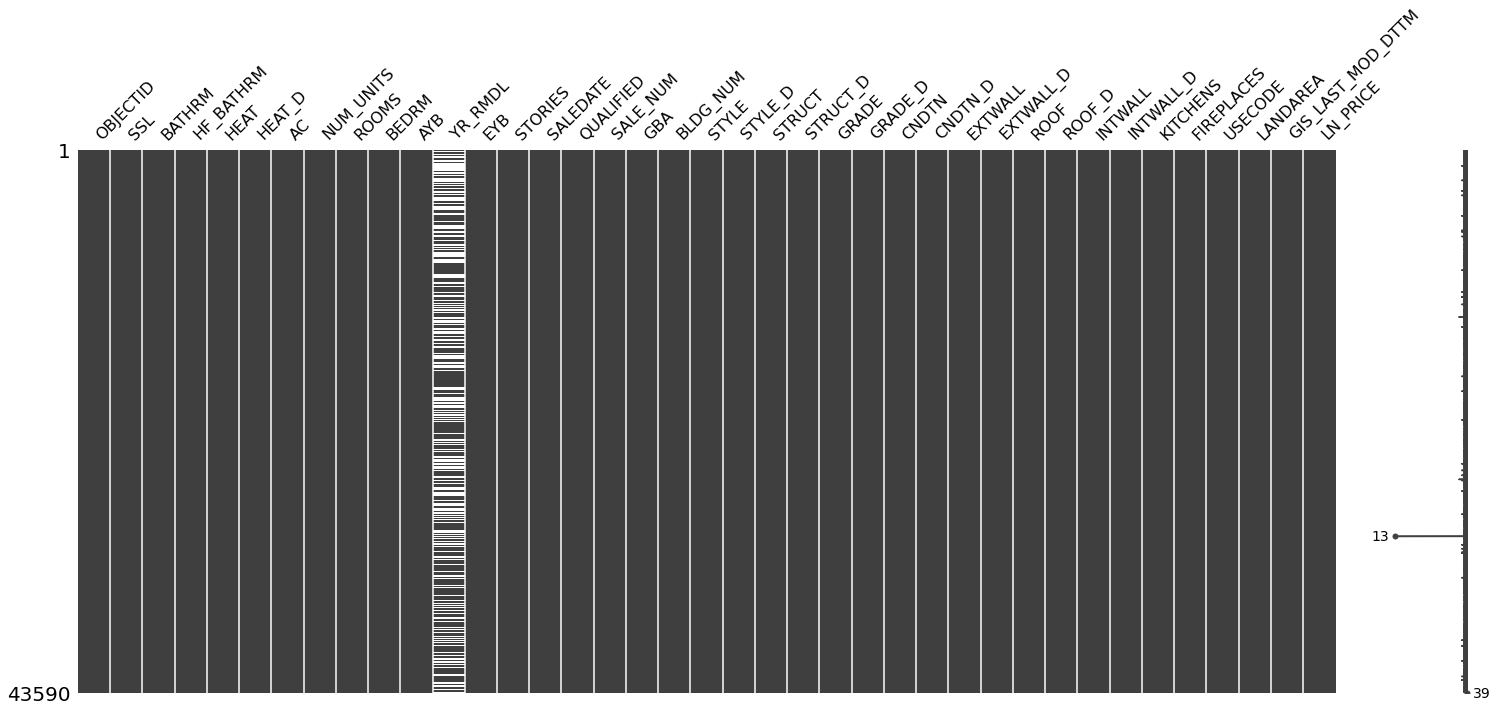

In [3]:
#see if there're missing data 
miss.matrix(train)

In [4]:
#check if there're missing data in LN_PRICE
train.isna().sum(axis = 0)
#No missing data in LN.PRICE 

OBJECTID                 0
SSL                      0
BATHRM                   1
HF_BATHRM                2
HEAT                     1
HEAT_D                   1
AC                       1
NUM_UNITS                1
ROOMS                   11
BEDRM                    4
AYB                      4
YR_RMDL              18583
EYB                      0
STORIES                 29
SALEDATE                 0
QUALIFIED                0
SALE_NUM                 0
GBA                      0
BLDG_NUM                 0
STYLE                    1
STYLE_D                  1
STRUCT                   1
STRUCT_D                 1
GRADE                    1
GRADE_D                  1
CNDTN                    1
CNDTN_D                  1
EXTWALL                  1
EXTWALL_D                1
ROOF                     1
ROOF_D                   1
INTWALL                  1
INTWALL_D                1
KITCHENS                 2
FIREPLACES               1
USECODE                  0
LANDAREA                 0
G

In [5]:
train.head(10)

,OBJECTID,SSL,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,...,ROOF,ROOF_D,INTWALL,INTWALL_D,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,LN_PRICE
0,78021,4061N 0085,3.0,1.0,1.0,Forced Air,Y,1.0,9.0,4.0,...,2.0,Built Up,6.0,Hardwood,1.0,0.0,11,2234,2018-07-22T18:01:43.000Z,13.591116
1,28783,1587 0075,2.0,1.0,7.0,Warm Cool,Y,1.0,7.0,3.0,...,11.0,Slate,6.0,Hardwood,1.0,1.0,12,3850,2018-07-22T18:01:43.000Z,12.730801
2,35035,2024 0817,2.0,2.0,13.0,Hot Water Rad,Y,1.0,9.0,4.0,...,11.0,Slate,6.0,Hardwood,1.0,1.0,12,7866,2018-07-22T18:01:43.000Z,13.651814
3,67983,3736 0059,1.0,1.0,7.0,Warm Cool,Y,1.0,6.0,3.0,...,2.0,Built Up,6.0,Hardwood,1.0,0.0,13,2739,2018-07-22T18:01:43.000Z,12.860999
4,8791,0817 0826,2.0,0.0,13.0,Hot Water Rad,N,1.0,11.0,4.0,...,6.0,Metal- Sms,6.0,Hardwood,1.0,0.0,11,2097,2018-07-22T18:01:43.000Z,14.100690
5,93105,5360 0207,3.0,1.0,1.0,Forced Air,Y,1.0,8.0,5.0,...,1.0,Comp Shingle,2.0,Carpet,1.0,0.0,12,5462,2018-07-22T18:01:43.000Z,12.779873
6,79858,4313 0019,3.0,0.0,1.0,Forced Air,Y,1.0,7.0,4.0,...,1.0,Comp Shingle,6.0,Hardwood,1.0,1.0,12,2399,2018-07-22T18:01:43.000Z,12.506129
7,13654,0957 0039,3.0,1.0,1.0,Forced Air,Y,2.0,7.0,3.0,...,2.0,Built Up,6.0,Hardwood,2.0,0.0,24,1360,2018-07-22T18:01:43.000Z,13.500800
8,21687,1112 0028,3.0,1.0,1.0,Forced Air,Y,1.0,9.0,3.0,...,2.0,Built Up,6.0,Hardwood,2.0,0.0,11,1602,2018-07-22T18:01:43.000Z,13.060488
9,45449,2770 0803,2.0,1.0,13.0,Hot Water Rad,Y,1.0,6.0,4.0,...,11.0,Slate,6.0,Hardwood,1.0,1.0,12,5000,2018-07-22T18:01:43.000Z,13.403776


In [6]:
#standardization

#Log land area 
train['LANDAREA'] = np.log(train['LANDAREA'])
#log GBA
train['GBA'] = np.log(train['GBA'])

In [7]:
#drop na, inf data
train = train.dropna()
train =train[~train.isin([np.nan, np.inf, -np.inf])]

In [8]:
#include only predictors 
train_x = train[['BATHRM','HF_BATHRM','HEAT','AC','ROOMS','BEDRM','GBA','LANDAREA','KITCHENS']]
#prediction outcome 
train_y = train['LN_PRICE']
#For 'AC': change from char to int 
train_x["AC"] = np.where(train_x["AC"] == "Y", 1, 0)

In [9]:
train_x.isna().sum() #make sure there're no NA's

BATHRM       0
HF_BATHRM    0
HEAT         0
AC           0
ROOMS        0
BEDRM        0
GBA          0
LANDAREA     0
KITCHENS     0
dtype: int64

### Pre-Processing

In [10]:
# rescale the data 
scaler = pp.MinMaxScaler()
col_names = list(train_x)
train_x = scaler.fit_transform(train_x)

In [11]:
train_x = pd.DataFrame(train_x,columns=col_names)
train_x

,BATHRM,HF_BATHRM,HEAT,AC,ROOMS,BEDRM,GBA,LANDAREA,KITCHENS
0,0.272727,0.090909,0.076923,1.0,0.300000,0.074074,0.308304,0.354963,0.022727
1,0.181818,0.181818,1.000000,1.0,0.300000,0.074074,0.468906,0.546214,0.022727
2,0.181818,0.000000,1.000000,0.0,0.366667,0.074074,0.539095,0.345348,0.022727
3,0.272727,0.000000,0.076923,1.0,0.233333,0.074074,0.332728,0.365790,0.022727
4,0.272727,0.090909,0.076923,1.0,0.233333,0.055556,0.391938,0.279556,0.045455
...,...,...,...,...,...,...,...,...,...
24993,0.090909,0.000000,0.076923,1.0,0.166667,0.037037,0.238064,0.144743,0.022727
24994,0.181818,0.090909,1.000000,1.0,0.233333,0.055556,0.373990,0.292711,0.022727
24995,0.181818,0.000000,1.000000,1.0,0.300000,0.074074,0.486138,0.283199,0.022727
24996,0.272727,0.090909,0.076923,1.0,0.200000,0.055556,0.345113,0.213070,0.045455


### Modeling

In [12]:
#to get same data splits for each fold
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

In [13]:
use_metrics = ["neg_mean_squared_error"]

In [14]:
#Linear model 
lm_scores = cross_validate(LM(),train_x.values,train_y.values, cv = fold_generator, scoring =use_metrics)
#KNN
knn_scores = cross_validate(KNN(),train_x,train_y, cv = fold_generator, scoring =use_metrics)
#Decision Tree
dt_scores = cross_validate(DTree(),train_x,train_y, cv = fold_generator, scoring =use_metrics)
#Bagging
bag_scores = cross_validate(Bag(),train_x,train_y, cv = fold_generator, scoring =use_metrics)
#random forest 
rf_scores = cross_validate(RF(),train_x,train_y, cv = fold_generator, scoring =use_metrics)

In [15]:
lm_scores

{'fit_time': array([0.13164783, 0.01411676, 0.01197028, 0.01195741, 0.01097512]),
 'score_time': array([0.        , 0.00188279, 0.00096488, 0.00122261, 0.00114822]),
 'test_neg_mean_squared_error': array([        nan, -0.38573017, -0.42883297, -0.41349787, -0.40580815])}

In [16]:
# Collect all the metrics
collect_scores = \
dict(lm = lm_scores['test_neg_mean_squared_error']*-1,
     knn = knn_scores['test_neg_mean_squared_error']*-1,
     dt = dt_scores['test_neg_mean_squared_error']*-1,
     bag = bag_scores['test_neg_mean_squared_error']*-1,
     rf = rf_scores['test_neg_mean_squared_error']*-1)

# Convert to a data frame and reshape
collect_scores = pd.DataFrame(collect_scores).melt(var_name="Model",value_name="MSE")
collect_scores

,Model,MSE
0,lm,NaN
1,lm,0.385730
2,lm,0.428833
3,lm,0.413498
4,lm,0.405808
5,knn,0.411918
6,knn,0.426070
7,knn,0.458995
8,knn,0.463355
9,knn,0.431402


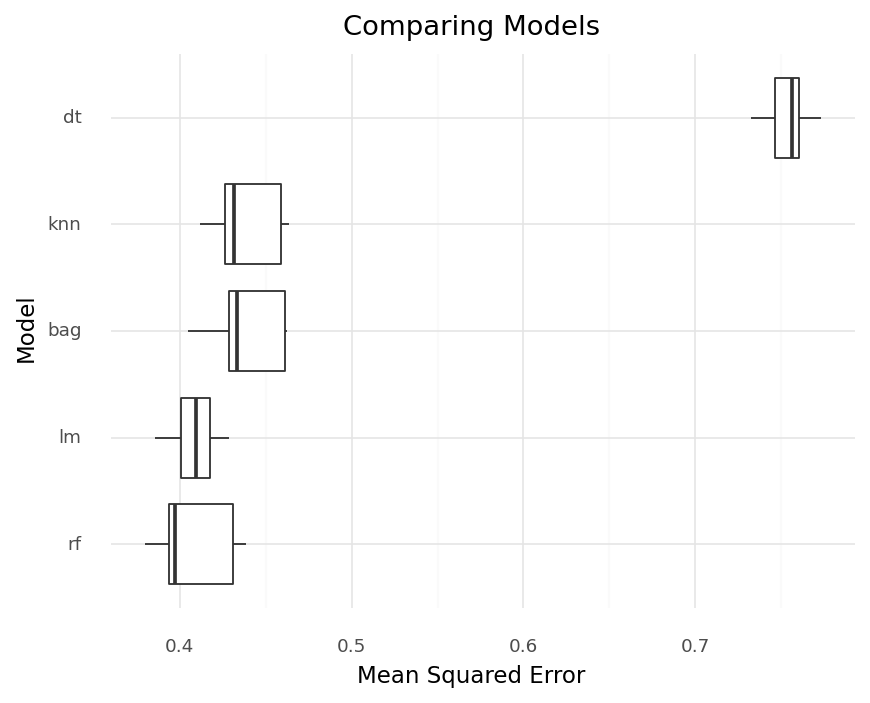

<ggplot: (-9223371861698617947)>

In [17]:
order = (collect_scores.groupby('Model').mean().sort_values(by="MSE").index.tolist())

# Plot
(
    ggplot(collect_scores,
          aes(x="Model",y="MSE")) +
    geom_boxplot() +
    scale_x_discrete(limits=order) +
    labs(x="Model",y="Mean Squared Error") +
    ggtitle("Comparing Models") +
    coord_flip() +
    theme_minimal() +
    theme(dpi=150)
)

On average, decision Tree has the highest mean squared error, and the random forest has the lowest mean squaed error. However, the absolute lowest mean squared error comes from a linear model

### Model Tuning 

In [18]:

#Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

#specify the preprocessing steps
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ['BATHRM','HF_BATHRM','HEAT','AC','ROOMS','BEDRM','GBA','LANDAREA','KITCHENS'])])


#create our model pipe
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])


#Specify the models 
search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[10,15,20,25,30]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[1,2,3,5]},
    
    # The Bagging decision tree model 
    {'model': [Bag()]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[1,2,3],
     'model__n_estimators':[500,1000,1250]},
]


search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

search.fit(train_x,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['BATHRM',
                                                                          'HF_BATHRM',
                                                                          'HEAT',
                                                                          'AC',
                                                                          'ROOMS',
                                                                          'BEDRM',
                                                                          'GBA',
                                                                          'LANDAREA',
                                           

In [19]:
#find the best score
search.best_score_

-0.38251422152114956

In [20]:
search.best_params_ #find the best model 

{'model': KNeighborsRegressor(n_neighbors=30), 'model__n_neighbors': 30}

### Test performance

In [21]:
#Clean test data 
#Log land area 
test['LANDAREA'] = np.log(test['LANDAREA'])
#log GBA
test['GBA'] = np.log(test['GBA'])
test = test.dropna()
test =test[~test.isin([np.nan, np.inf, -np.inf])]
#include only predictors 
test_x = test[['BATHRM','HF_BATHRM','HEAT','AC','ROOMS','BEDRM','GBA','LANDAREA','KITCHENS']]
#prediction outcome 
test_y = test['LN_PRICE']
test_x["AC"] = np.where(test_x["AC"] == "Y", 1, 0)

In [22]:
scaler = pp.MinMaxScaler()
col_names = list(train_x)
test_x = scaler.fit_transform(test_x)
test_x = pd.DataFrame(test_x,columns=col_names)

In [23]:
pred_y = search.predict(test_x)
pred_y

array([12.95103235, 14.18663983, 13.57596768, ..., 13.39874621,
       13.91110453, 12.7456665 ])

In [24]:
m.mean_squared_error(test_y,pred_y)

0.3735371976318985

In [25]:
m.r2_score(test_y,pred_y)

0.3836071304324252

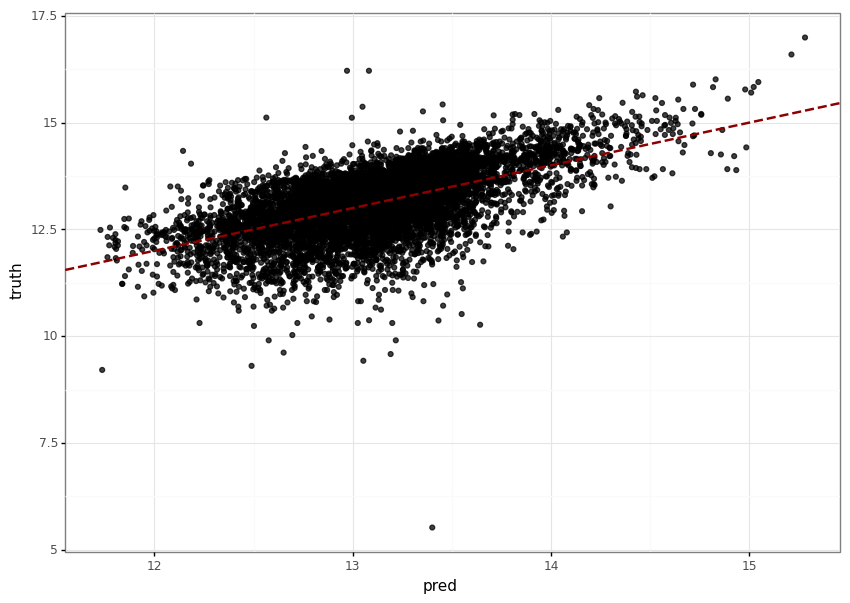

<ggplot: (175155923292)>

In [26]:
(
    ggplot(pd.DataFrame(dict(pred=pred_y,truth=test_y)),
          aes(x='pred',y="truth")) +
    geom_point(alpha=.75) +
    geom_abline(linetype="dashed",color="darkred",size=1) +
    theme_bw() +
    theme(figure_size=(10,7))
)